<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/TIC/Aula_07_Arvore_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# **Árvore de Decisão**

Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Estes modelos utilizam a estratégia de dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema.

```
As árvores de decisão estão entre os mais populares algoritmos de inferência e tem sido aplicado em várias áreas como, por exemplo, diagnóstico médico e
risco de crédito.
```

# Exemplos

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_trees_ex1.png'>

# Exemplo (completo)

Para entender como funciona uma árvore de decisão, considere os dados apresentados no *scatterplot* abaixo. Esses dados representam características de 54 motores que estão em bom funcionamento (20 pontos em verde - classe 0) ou com funcionamento irregular (34 pontos em vermelho - classe 1). Como características, temos a temperatura do motor e a rotação por minuto (RPM). Com base nesses dados, então, queremos construir uma inteligência computacional capaz de identificador se um novo motor está ou não em bom funcionamento a partir dessas características (medidas através de sensores, por exemplo).

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_trees_motor1.png'>

A ideia por trás de uma Árvore de Decisão é criar partições no espaço dos atributos de maneira a separar as classes. Então, o critério utilizado para realizar as partições é o que traz uma maior ganho de informação para realizar a classificação dos dados. Assim, como será visto com maior detalhe na sequência, esse ganho de informação está relacionado ao quanto a partição consegue discriminar os dados entre as classes. Escolhe-se como valor do atributo para o corrente nó aquele que resulta no **maior ganho de informação**.

Em nosso exemplo, podemos iniciar a árvore de decisão com um primeiro nó particionando os dados de acordo com a Temperatura.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_trees_motor2.png'>

Note que, ao particionar os dados, obtemos 3 sub-grupos onde temos diferentes proporções de dados de cada classe. Mas como medir se essa partição foi boa? Para responder a essa pergunta, usamos uma medida de ganho de informação. Mas, antes de calcular o ganho de informação, precisamos medir a impureza dos dados em cada nó. Uma forma de medir tal impureza é a partir da entropia (há outras medidas, como o *Gini*, mas aqui vamos explorar apenas a entropia).

**Entropia**

A entropia caracteriza a impureza dos dados: é uma medida da falta de homogeneidade dos dados de entrada em relação a sua classificação. Por exemplo, a entropia é máxima (igual a 1) quando o conjunto de dados é heterogêneo (as classes ainda não estão discriminadas). Por outro lado, a entropia é mínima (igual a 0) quando o conjunto de dados é homogênio (as classes estão bem discriminadas).

Dado um conjunto de entrada ($s$) que pode ter $c$ classes distintas, a entropia de $s$ será dada por

$$ Entropia(s) =  \sum_i^c -p_i \times log_2(p_i), $$

em que  $p_i$ é a proporção de dados em $s$ que pertencem à classe $i$.

Em nosso exemplo, no nó raiz (antes da primeira partição), a entropia é dada por

$$ Entropia =  \left(- \frac{34}{54} * log_2 \left(\frac{34}{54} \right) \right) + \left(- \frac{20}{54} * log_2 \left(\frac{20}{54} \right) \right) = 0.4356 + 0.5307 = 0.9509. $$

Ou seja, obviamente, os dados ainda não estão separados. Após particionar os dados por $x_1 < 49$, a entropia do nó resultante (nó intermediário) foi

$$ Entropia =  -1 * log_2(1) = 0. $$

Nesse caso, houve uma separação das classes nesse nó. Por outro lado, o nó resultante de $62 \geq x_1 \geq 49$ possui a seguinte entropia:

$$ Entropia =  \left(- \frac{16}{36} * log_2 \left(\frac{16}{36} \right) \right) + \left(- \frac{20}{36} * log_2 \left(\frac{20}{36} \right) \right) = 0.5199 + 0.4711 = 0.9910, $$

ou seja, os dados ainda não estão bem separados. Após calcular a entropia para todos os nós resultantes de uma partição, podemos determinar o ganho de informação associado.

**Ganho de informação**

O ganho de informação vai indicar o quanto a partição foi boa. Basicamente, esse cálculo leva em conta se os dados ficaram os não misturados nas partições intermediárias (ou seja, a impureza desses nós).

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_trees_ex2.png'>

para o cálculo, avaliamos a entropia do "nó pai" (nó que foi feito a partição) e os "nós filhos" (nós intermediários) após a partição. A fórmula é dada por:

$$GI = Entropia(pai) - \sum_j^r w_j Entropia(filho_j), $$

onde $w_j$ é a proporção dos dados contidos no nó filho $j$.

Em nosso exemplo, após a primeira partição, temos seguinte o ganho de informação:

$$GI = 0.9509 - \frac{8}{54} * 0 - \frac{36}{54} * 0.9910 - \frac{10}{54} * 0 = 0.2902. $$

Note que esse ganho de informação aconteceu em um cenário onde conseguimos separar bem uma das classes (pontos em vermelho) em duas dar partições. Mas, se ao invés dos valores usamos nessa partição, tivéssemos usados outros valores, poderíamos ter alcançado um valor pior de ganho de informação. Lembrando que quanto maior o ganho de informação, melhor foi a escolha da partição.

*Para fazer em casa:* Refaça os cálculos assumindo como partição $x_1 < 52$ ao invés de $x_1 < 49$ (quatros pontos em verde ficaria nessa partição).



Seguindo com as partições, como ainda temos um nó com alta impureza, continuamos particionando. Mas, agora, faremos a partição com base na RPM. Após particionar os dados por $x_2 < 5800$, $5800 \geq x_2 \geq 7000$ e $x_2 \geq 7000$, as entropias dos nós resultantes (nós finais) foram todos iguais a 0. Ou seja, houve uma completa separação das classes. Ao calcularmos o ganho de informação, obtemos o valor máximo para essa partição, que no caso, é o mesmo valor de 0.2902.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_trees_motor30.png'>

# Atenção!

Neste exemplo simples, conseguimos separar todas as classes perfeitamente. No entanto, isso raramente acontece na prática. Então, para ajustar o modelo de Árvore de Decisão que melhor se adequa aos dados utilizados, procuramos avaliar (de forma a varrer o espaço dos atributos) quais os valores dos atributos usados nas partições que fornecem os maiores ganhos de informação. Para essa varredura, há um alto custo de treinamento.

Veja abaixo os pontos positivos e negativos em se usar uma Árvore de Decisão:

Prós:

* Não é um modelo *black-box*, ou seja, os resultados podem ser interpretados.
* É eficiente
* Permite trabalhar diretamente com valores categóricos

Limitações
* Tem um alto custo de treinamento
* É sensível a sobreajuste(\*)

(\*) Para minimizar esse efeito pode-se fazer a *poda* de níveis da Árvore ou emprego de **Random Forests**.

## Exercício usando o `sklearn`: Banknote Autentication

Agora vamos ver um caso de dados reais. Esse conjunto de dados, chamado [Banknote Autentication](https://archive.ics.uci.edu/dataset/267/banknote+authentication), descreve 1372 cédulas a partir de quatro características extraídas de cada uma delas: *variance*, *skewness*, *curtosis* e *entropy*. Essas características são extraídas das imagens a partir de uma transformação usada em processamento de sinais (*Wavelet Transform*), a qual permite representar uma imagem a partir de medidades numéricas/estatísticas. Além dessas características, também temos a informação se cada cédula é verdadeira (classe 1) ou falsa (classe 0).

Veja na sequência uma descrição desse conjunto de dados.





In [ ]:
# Importando bibliotecas

import pandas                  as pd
#import numpy                   as np
#import matplotlib.pyplot       as plt
#import seaborn                 as sns

#import warnings
#warnings.filterwarnings("ignore")

notes = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_banknotes.csv")
notes.head()

,variance,skewness,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Explorando os dados (númnero de linhas e colunas)
notes.shape

(1372, 5)

In [ ]:
# Explorando os dados (classes)
notes.authentic.value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [ ]:
# Explorando os dados (dados faltantes)
notes.isnull().sum()

variance     0
skewness     0
kurtosis     0
entropy      0
authentic    0
dtype: int64

In [ ]:
# Explorando os dados (tipo de dados)
notes.dtypes

variance     float64
skewness     float64
kurtosis     float64
entropy      float64
authentic      int64
dtype: object

### Árvore de Decisão: Treinamento e Teste

Lembrando que os conjuntos de Treinamento e Teste são produzidos aleatoriamente. No entanto, ao definir o `seed` (semente de geração aleatória), garantimos a mesma separação para diferentes execuções do comando. Ou seja, nesse caso, garantimos a reprodutibilidade das execuções.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Preparando os dados
X = notes.drop(columns=['authentic'])
y = notes['authentic']

# Separando os dados de Treinamento e Teste
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

# Declarando o Modelo
clf = DecisionTreeClassifier(criterion='entropy',random_state=seed)
#clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,min_samples_split=5,max_depth=None,random_state=seed)

# Aprendizado
clf.fit(X_train, y_train)                  # Emprega o conjunto de treinamento
y_pred = clf.predict(X_test)


### Avaliando o ajuste

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Comparando os valores observados com os preditos
pd.DataFrame({"Valores observados":y_test,
              "Valores preditos": y_pred})


,Valores observados,Valores preditos
938,1,1
668,0,0
401,0,0
906,1,1
1308,1,1
...,...,...
757,0,0
789,1,1
930,1,1
701,0,0


In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[226,   3],
       [  2, 181]])

In [ ]:
# Acuracia
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9878640776699029

In [ ]:
# classification_report (exibe outras medidas de desempenho de um classificador)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Para quem se interessar, aqui tem uma explicação sobre as outras métricas de classificação: [Métricas de classificação](https://medium.com/kunumi/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-em-machine-learning-classifica%C3%A7%C3%A3o-49340dcdb198).

### Exibindo a Árvore

Não vamos trabalhar com o gráfico das Árvores. Mas deixamos o código aqui para que você empregue se tiver interesse.

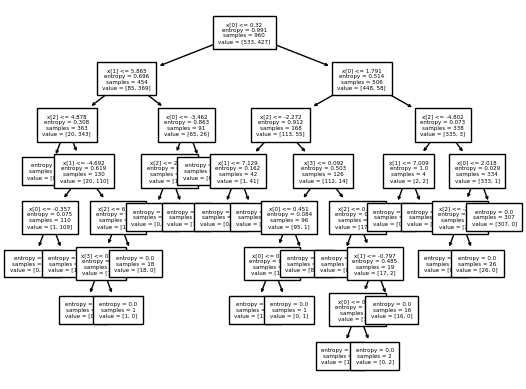

In [ ]:
from sklearn import tree
tree.plot_tree(clf, fontsize=4);

### Opções código!

- **min_samples_leaf** (Número Mínimo de Amostras em uma Folha):
Se o número de amostras em uma folha for menor do que o valor definido em **min_samples_leaf**, então a divisão (split) não será realizada e a folha será considerada pura.

- **min_samples_split** (Número Mínimo de Amostras para Divisão):
número mínimo de amostras necessárias para realizar uma divisão em um nó (um ponto onde a árvore se ramifica).
Se o número de amostras em um nó for menor do que o valor definido em min_samples_split, então a divisão não será realizada, e esse nó se tornará uma folha (caso contrário, a árvore continuará dividindo).

- **max_depth**(Profundidade Máxima da Árvore):
Define o número máximo de níveis ou camadas que a árvore de decisão pode ter a partir do nó raiz (o topo da árvore).
